## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.

1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

In [1]:
# Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado, imputar_fechas

df_orig = imputar_fechas()

#df_orig = pd.read_csv("avocado_with_region_types.csv")

# guardamos el original y trabajamos con una copia
df = df_orig.copy()


1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


In [2]:
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

df['Date'] = pd.to_datetime(df['Date'])

# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.

df[["Date", "region", "region_type", "AveragePrice"]].groupby(by=["Date","region_type", "region"]).mean()


AveragePrice
Date       region_type region                         
2015-01-04 City        Albany                    1.505
                       Atlanta                   1.380
                       Boise                     1.325
                       Boston                    1.425
                       Charlotte                 1.660
...                                                ...
2018-03-25 Region      RaleighGreensboro         1.630
                       RichmondNorfolk           1.260
                       WestTexNewMexico          1.230
           State       SouthCarolina             1.285
           TotalUS     TotalUS                   1.290

[9126 rows x 1 columns]

In [3]:
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos
import seaborn as sns
import matplotlib.pyplot as plt


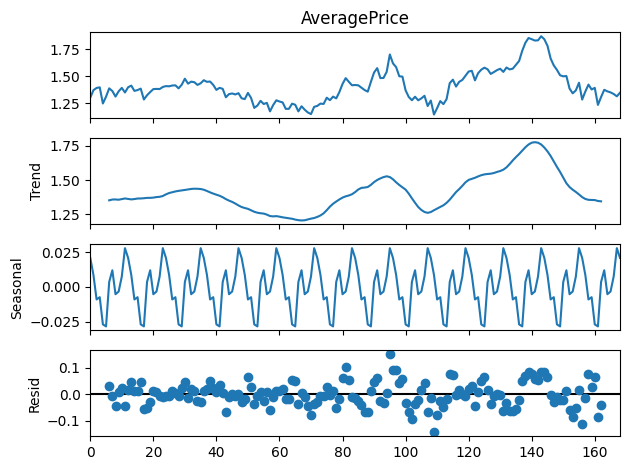

In [4]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df_grouped = df.groupby('Date')['AveragePrice'].mean().reset_index()

period = 12

result = seasonal_decompose(df_grouped['AveragePrice'], model='additive', period=period)
result.plot()

plt.show()

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

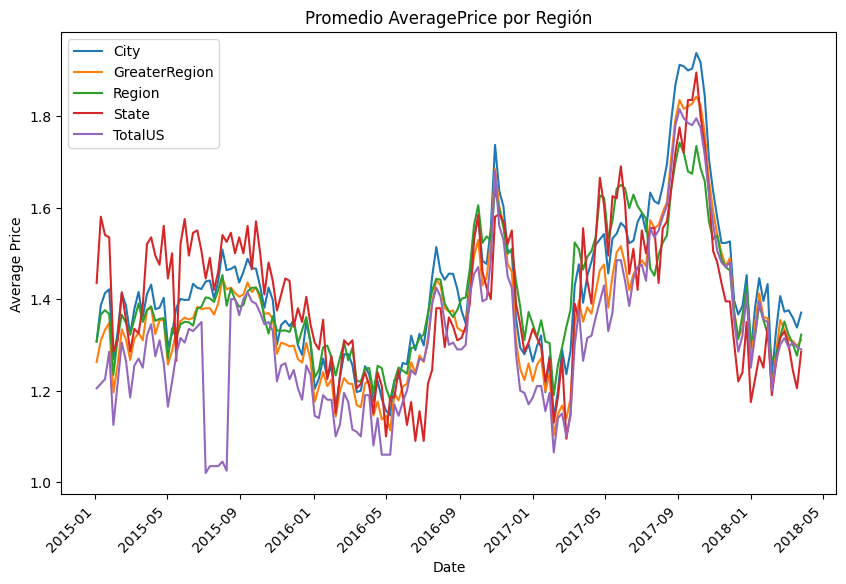

In [5]:
# Group by 'Date' and 'region_type' and calculate the mean of 'AveragePrice'
df_grouped = df.groupby(['Date', 'region_type'])['AveragePrice'].mean().reset_index()

# Create separate plots for each region_type
plt.figure(figsize=(10,6))

for region_type in df_grouped['region_type'].unique():
    region_type_data = df_grouped[df_grouped['region_type'] == region_type]
    plt.plot(region_type_data['Date'], region_type_data['AveragePrice'], label=region_type)
 
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Promedio AveragePrice por Región')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.legend()
plt.show()

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

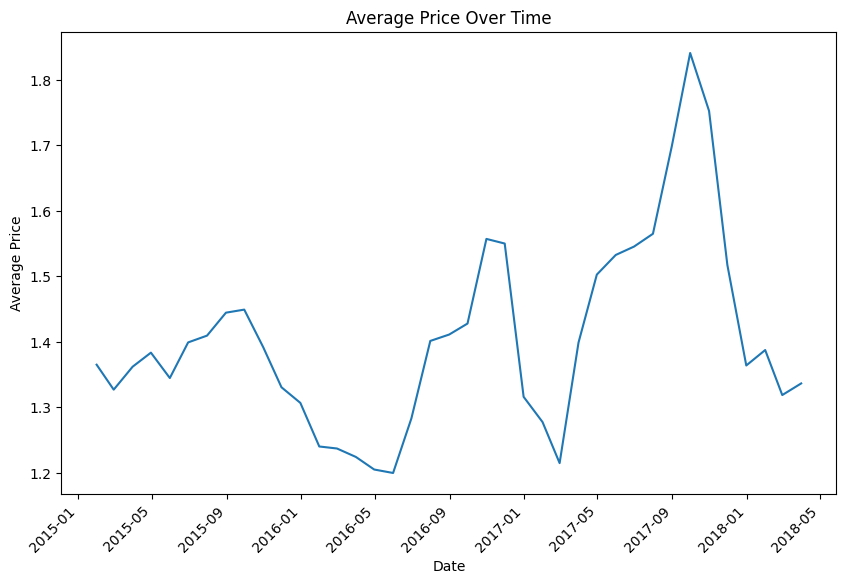

In [6]:
# Using AveragePrice and Date calculate and compare average monthly prices
df_grouped = df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()

# Plot the average monthly
plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.show()

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

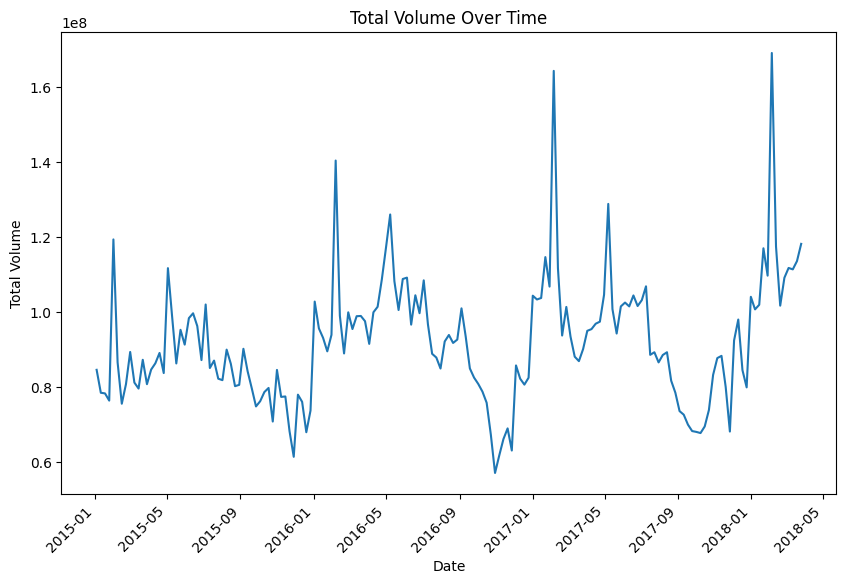

In [7]:
df_grouped = df.groupby('Date')['Total Volume'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['Total Volume'])
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.title('Total Volume Over Time')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.show()


5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

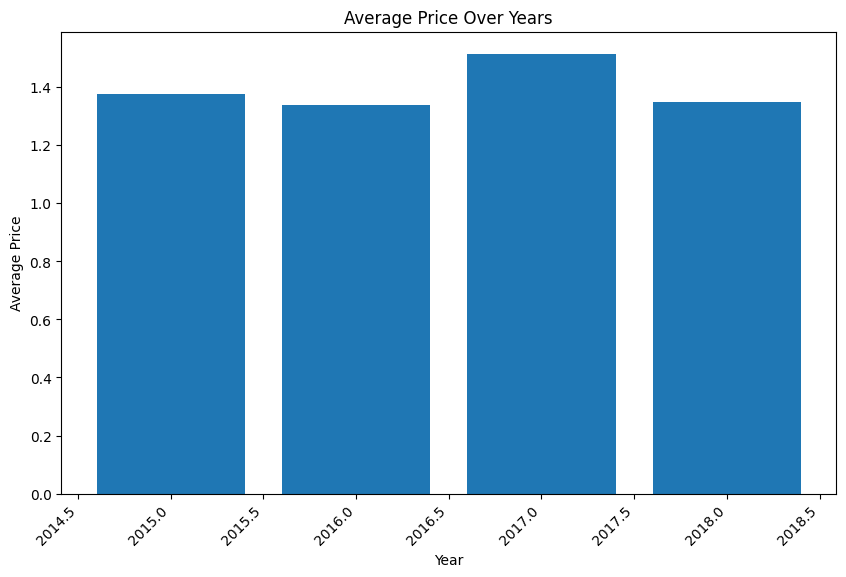

In [8]:
df_grouped = df.groupby('year')['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(df_grouped['year'], df_grouped['AveragePrice'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Over Years')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.show()
